In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 Means not froud data
1 froud data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

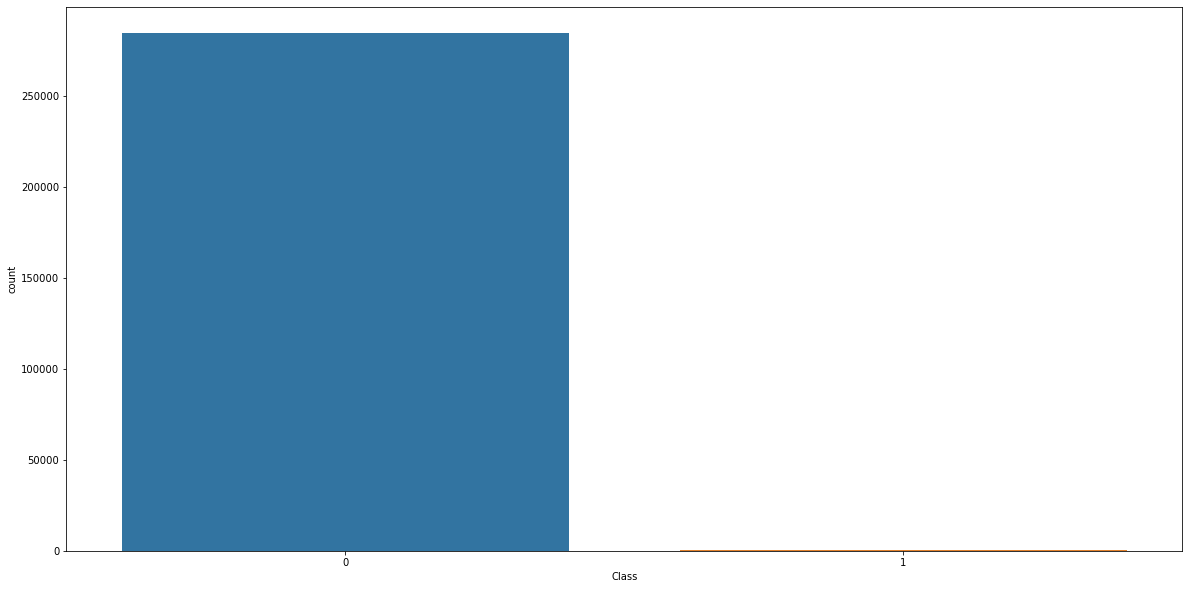

In [6]:
plt.figure(figsize=(20,10))
sns.countplot('Class',data=df)

In [7]:
df.Class.value_counts()/df.Time.count()*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

### We have less than 1% froud data sample to train the moder to predect the froud.

## ML Model Selection
### We have categorical dependent variable or Feature as 'Class' so i have decided to select the classification ML model.
#### Example 
1. SVM (Support vector Machine)


In [8]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [9]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
print('Amount details of the valid transaction')
valid.Amount.describe()

Amount details of the valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

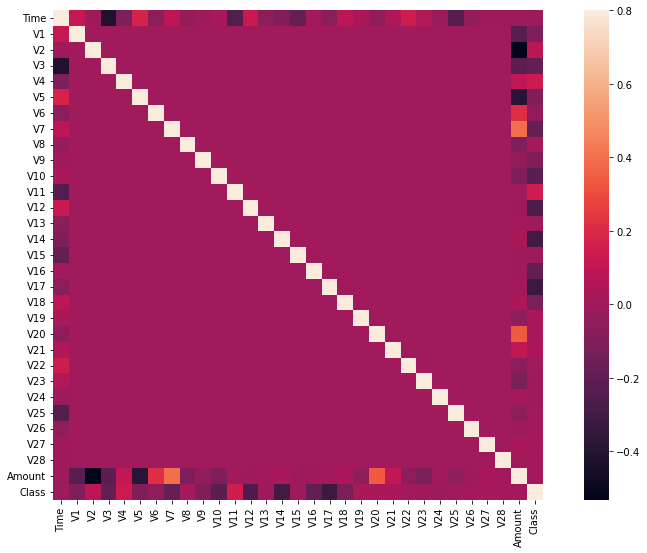

In [11]:

# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (15, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features 
but there are some features that either has a positive or a negative correlation with each other. 
For example, V2 and V5 are highly negatively correlated with the feature called Amount. 
We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data 
available to us.

In [12]:
# dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


### Training and Testing Data Bifurcation
##### We will be dividing the dataset into two main groups. 
##### One for training the model and the other for Testing our trained model’s performance.

In [13]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split 

xTrain, xTest, yTrain, yTest = train_test_split(
        X, Y, test_size = 0.2, random_state = 42)

In [14]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [15]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
  
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))
  
rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))
  
f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995435553526912
The precision is 0.9615384615384616
The recall is 0.7653061224489796
The F1-Score is 0.8522727272727273
The Matthews correlation coefficient is0.8576194535617819
